<a href="https://colab.research.google.com/github/gksals8378/Lending_club/blob/main/0921_Lending_club(ML_DL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# warning메시지 무시
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/data/0preporcessing/lending_club_labeled.csv")
df.drop(['Unnamed: 0'], inplace=True, axis=1)

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'emp_category'],
      dtype='object')

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,emp_category
0,10000.0,0,11.44,329.48,24,10,5,117000.0,0,1,...,26.24,16.0,0.0,36369.0,41.8,25.0,1,1,0.0,9963
1,8000.0,0,11.99,265.68,25,4,1,65000.0,0,1,...,22.05,17.0,0.0,20131.0,53.3,27.0,0,1,3.0,4119
2,15600.0,0,10.49,506.97,23,1,5,43057.0,1,1,...,12.79,13.0,0.0,11987.0,92.2,26.0,0,1,0.0,15862
3,7200.0,0,6.49,220.65,12,6,5,54000.0,0,1,...,2.60,6.0,0.0,5472.0,21.5,13.0,0,1,0.0,15101
4,24375.0,1,17.27,609.33,35,9,1,55000.0,2,0,...,33.95,13.0,0.0,24584.0,69.8,43.0,0,1,1.0,3929


In [ ]:
df['sub_grade'] = df['sub_grade'].astype(str)
df['grade'] = df['sub_grade'].apply(lambda x: x[0:1])

df['grade'] = df['grade'].astype(int)
df['sub_grade'] = df['sub_grade'].astype(int)

In [ ]:
df

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,emp_category,grade
0,10000.0,0,11.44,329.48,24,10,5,117000.0,0,1,...,16.0,0.0,36369.0,41.8,25.0,1,1,0.0,9963,2
1,8000.0,0,11.99,265.68,25,4,1,65000.0,0,1,...,17.0,0.0,20131.0,53.3,27.0,0,1,3.0,4119,2
2,15600.0,0,10.49,506.97,23,1,5,43057.0,1,1,...,13.0,0.0,11987.0,92.2,26.0,0,1,0.0,15862,2
3,7200.0,0,6.49,220.65,12,6,5,54000.0,0,1,...,6.0,0.0,5472.0,21.5,13.0,0,1,0.0,15101,1
4,24375.0,1,17.27,609.33,35,9,1,55000.0,2,0,...,13.0,0.0,24584.0,69.8,43.0,0,1,1.0,3929,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395749,10000.0,1,10.99,217.38,24,2,5,40000.0,1,1,...,6.0,0.0,1990.0,34.3,23.0,1,1,0.0,15101,2
395750,21000.0,0,12.29,700.42,31,5,1,110000.0,1,1,...,6.0,0.0,43263.0,95.7,8.0,0,1,1.0,482,3
395751,5000.0,0,9.99,161.32,21,10,5,56500.0,2,1,...,15.0,0.0,32704.0,66.9,23.0,0,1,0.0,2992,2
395752,21000.0,1,15.31,503.02,32,10,1,64000.0,2,1,...,9.0,0.0,15704.0,53.8,20.0,0,1,5.0,3929,3


# y = loan_status

In [ ]:
import numpy as np
a = np.abs(df.corr().round(3)['loan_status'])
a.sort_values(ascending=False)[1:6] #상위 5개, 자기 자신 제외

sub_grade     0.262
grade         0.257
int_rate      0.248
term          0.173
revol_util    0.082
Name: loan_status, dtype: float64

In [ ]:
X = df[['grade', 'int_rate', 'term', 'revol_util', 'verification_status']]
y = df['loan_status']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(277027, 5)
(118727, 5)
(277027,)
(118727,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# from sklearn.svm import SVC
# from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# from tqdm.notebook import tqdm

# svc = SVC(random_state=0,  probability=True)

# with tqdm(total=len(X_train)) as pbar:
#     svc.fit(X_train, y_train)
#     pbar.update(len(X_train))

# y_pred = svc.predict(X_test)

# cm = confusion_matrix(y_test, y_pred)

# print("Confusion Matrix:")
# print(cm)

# accuracy = accuracy_score(y_test, y_pred)
# print("SVM Accuracy : ", accuracy)
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# RandomForestClassifier
- 비대칭 데이터 문제를 해결하기 위해 smote를 이용하여 over sampling

In [ ]:
# over sampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=1)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from tqdm.notebook import tqdm

rf = RandomForestClassifier(n_estimators=30, max_features=3, max_depth=7, random_state=1)

with tqdm(total=len(X_train_over)) as pbar:
    rf.fit(X_train_over, y_train_over)
    pbar.update(len(X_train_over))

y_pred = rf.predict(X_test)

  0%|          | 0/445400 [00:00<?, ?it/s]

In [ ]:
rf.score(X_train_over,y_train_over)

0.6567916479568927

In [ ]:
# feature importances

feature_importances = rf.feature_importances_
s_f_i = pd.Series(feature_importances, index=X.columns)
s_f_i = s_f_i.sort_values(ascending=False)

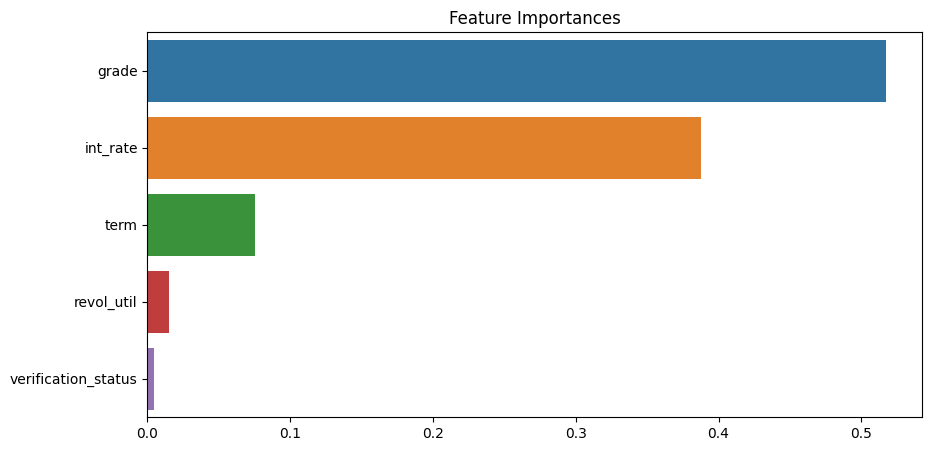

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.barplot(x=s_f_i, y=s_f_i.index)
plt.title('Feature Importances')
plt.show()

- 비대칭 데이터에서 Accuracy는 사용하면 안되는 평가 기준이다.
- G - Mean을 평가 기준으로 한다.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from scipy.stats import gmean
print("Random Forest Classifier\n")
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

TP = cm[1][1]
FN = cm[1][0]
TN = cm[0][0]
FP = cm[0][1]

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("G-Mean : ", gmean([sensitivity, specificity]),"\n")

accuracy = accuracy_score(y_test, y_pred)
print("RandomForestClassifier Accuracy : ", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Classifier

Confusion Matrix:
[[15379  7904]
 [36131 59313]]
G-Mean :  0.6406859626708373 

RandomForestClassifier Accuracy :  0.629107111272078
Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.66      0.41     23283
           1       0.88      0.62      0.73     95444

    accuracy                           0.63    118727
   macro avg       0.59      0.64      0.57    118727
weighted avg       0.77      0.63      0.67    118727



# Grid Search

In [ ]:
params = { 'n_estimators' : [400, 500],
           'max_depth' : [6, 8, 10, 12]
         }


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

scorer = make_scorer(gmean)
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=1),
                           param_grid=params,
                           scoring=scorer,
                           cv=3,
                           n_jobs=1,
                           verbose=2)

for i in tqdm(range(len(params['n_estimators']))):
    grid_search.fit(X_train_over, y_train_over)

  0%|          | 0/2 [00:00<?, ?it/s]

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ......................max_depth=6, n_estimators=400; total time= 1.1min
[CV] END ......................max_depth=6, n_estimators=400; total time=  60.0s
[CV] END ......................max_depth=6, n_estimators=400; total time= 1.0min
[CV] END ......................max_depth=6, n_estimators=500; total time= 1.3min
[CV] END ......................max_depth=6, n_estimators=500; total time= 1.3min
[CV] END ......................max_depth=6, n_estimators=500; total time= 1.3min
[CV] END ......................max_depth=8, n_estimators=400; total time= 1.3min
[CV] END ......................max_depth=8, n_estimators=400; total time= 1.3min
[CV] END ......................max_depth=8, n_estimators=400; total time= 1.2min
[CV] END ......................max_depth=8, n_estimators=500; total time= 1.7min
[CV] END ......................max_depth=8, n_estimators=500; total time= 1.6min
[CV] END ......................max_depth=8, n_est

In [ ]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("Grid Search CV\n")
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

TP = cm[1][1]
FN = cm[1][0]
TN = cm[0][0]
FP = cm[0][1]

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("G-Mean : ", gmean([sensitivity, specificity]),"\n")

accuracy = accuracy_score(y_test, y_pred)
print("RandomForestClassifier Accuracy : ", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Grid Search CV

Confusion Matrix:
[[15797  7486]
 [38079 57365]]
G-Mean :  0.6385825149374768 

RandomForestClassifier Accuracy :  0.6162204047941917
Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.68      0.41     23283
           1       0.88      0.60      0.72     95444

    accuracy                           0.62    118727
   macro avg       0.59      0.64      0.56    118727
weighted avg       0.77      0.62      0.66    118727



# Easy Ensemble Classifier

In [ ]:
# X_train_over,y_train_over
from imblearn.ensemble import EasyEnsembleClassifier
from tqdm.notebook import tqdm

eec = EasyEnsembleClassifier(n_estimators=30, random_state=1)

with tqdm(total=len(X_train)) as pbar:
    eec.fit(X_train, y_train)
    pbar.update(len(X_train))

y_pred = eec.predict(X_test)

  0%|          | 0/277027 [00:00<?, ?it/s]

In [ ]:
eec.score(X_train,y_train)

0.609817815591982

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from scipy.stats import gmean
print("Easy Ensemble Classifier\n")
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

TP = cm[1][1]
FN = cm[1][0]
TN = cm[0][0]
FP = cm[0][1]

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("G-Mean : ", gmean([sensitivity, specificity]),"\n")

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : ", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))



Easy Ensemble Classifier

Confusion Matrix:
[[15941  7342]
 [38946 56498]]
G-Mean :  0.6366203733134719 

Accuracy :  0.6101308042820925
Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.68      0.41     23283
           1       0.88      0.59      0.71     95444

    accuracy                           0.61    118727
   macro avg       0.59      0.64      0.56    118727
weighted avg       0.77      0.61      0.65    118727



# Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adab = AdaBoostClassifier(random_state=1)

adab.fit(X_train_over, y_train_over)
y_pred = adab.predict(X_test)

In [ ]:
print("Ada Boost\n")
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

TP = cm[1][1]
FN = cm[1][0]
TN = cm[0][0]
FP = cm[0][1]

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("G-Mean : ", gmean([sensitivity, specificity]),"\n")

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : ", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Ada Boost

Confusion Matrix:
[[16146  7137]
 [39904 55540]]
G-Mean :  0.6352455430429745 

Accuracy :  0.6037885232508191
Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.69      0.41     23283
           1       0.89      0.58      0.70     95444

    accuracy                           0.60    118727
   macro avg       0.59      0.64      0.55    118727
weighted avg       0.77      0.60      0.64    118727



#Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gradb = GradientBoostingClassifier(random_state=1).fit(X_train_over, y_train_over)
y_pred = gradb.predict(X_test)

In [ ]:
print("Gradient Boost\n")
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

TP = cm[1][1]
FN = cm[1][0]
TN = cm[0][0]
FP = cm[0][1]

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("G-Mean : ", gmean([sensitivity, specificity]),"\n")

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : ", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Gradient Boost

Confusion Matrix:
[[15084  8199]
 [35256 60188]]
G-Mean :  0.6391744889993538 

Accuracy :  0.6339922679761133
Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.65      0.41     23283
           1       0.88      0.63      0.73     95444

    accuracy                           0.63    118727
   macro avg       0.59      0.64      0.57    118727
weighted avg       0.77      0.63      0.67    118727



# XGBoost

In [ ]:
!pip install xgboost

In [ ]:
import xgboost
xbg = xgboost.XGBClassifier(learning_rate=0.1,
                            n_estimators=100,
                            max_depth=3,
                            objective='binary:logistic',
                            # objective = "binary:logistic“, “reg:linear”“, “multi:softmax” : 이항 / 연속 / 다항
                            random_state=1).fit(X_train_over, y_train_over)
y_pred = gradb.predict(X_test)

In [ ]:
print("XGBoost\n")
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

TP = cm[1][1]
FN = cm[1][0]
TN = cm[0][0]
FP = cm[0][1]

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("G-Mean : ", gmean([sensitivity, specificity]),"\n")

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : ", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

XGBoost

Confusion Matrix:
[[15084  8199]
 [35256 60188]]
G-Mean :  0.6391744889993538 

Accuracy :  0.6339922679761133
Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.65      0.41     23283
           1       0.88      0.63      0.73     95444

    accuracy                           0.63    118727
   macro avg       0.59      0.64      0.57    118727
weighted avg       0.77      0.63      0.67    118727



# DL

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
model = Sequential()
model.add(Dense(128, activation = 'relu', input_shape=(X_train_over.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=5)
mc = ModelCheckpoint(filepath='best.h5', verbose=1, monitor='val_loss', mode='auto', save_best_only=True)


In [ ]:
from tqdm.keras import TqdmCallback


history = model.fit(X_train_over, y_train_over, epochs=50,
                    validation_data=(X_test, y_test),
                    verbose=0,
                    callbacks=[es, mc, TqdmCallback(verbose=1)])

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]


Epoch 1: val_loss improved from inf to 0.64228, saving model to best.h5

Epoch 2: val_loss improved from 0.64228 to 0.62341, saving model to best.h5

Epoch 3: val_loss improved from 0.62341 to 0.60592, saving model to best.h5

Epoch 4: val_loss did not improve from 0.60592

Epoch 5: val_loss did not improve from 0.60592

Epoch 6: val_loss did not improve from 0.60592

Epoch 7: val_loss did not improve from 0.60592

Epoch 8: val_loss did not improve from 0.60592
Epoch 8: early stopping


In [ ]:
print(f"Training Accuracy: {history.history['acc'][-1]:.4f}")

Training Accuracy: 0.6345


In [ ]:
print(f"Validation Accuracy: {history.history['val_acc'][-1]:.4f}")

Validation Accuracy: 0.6408


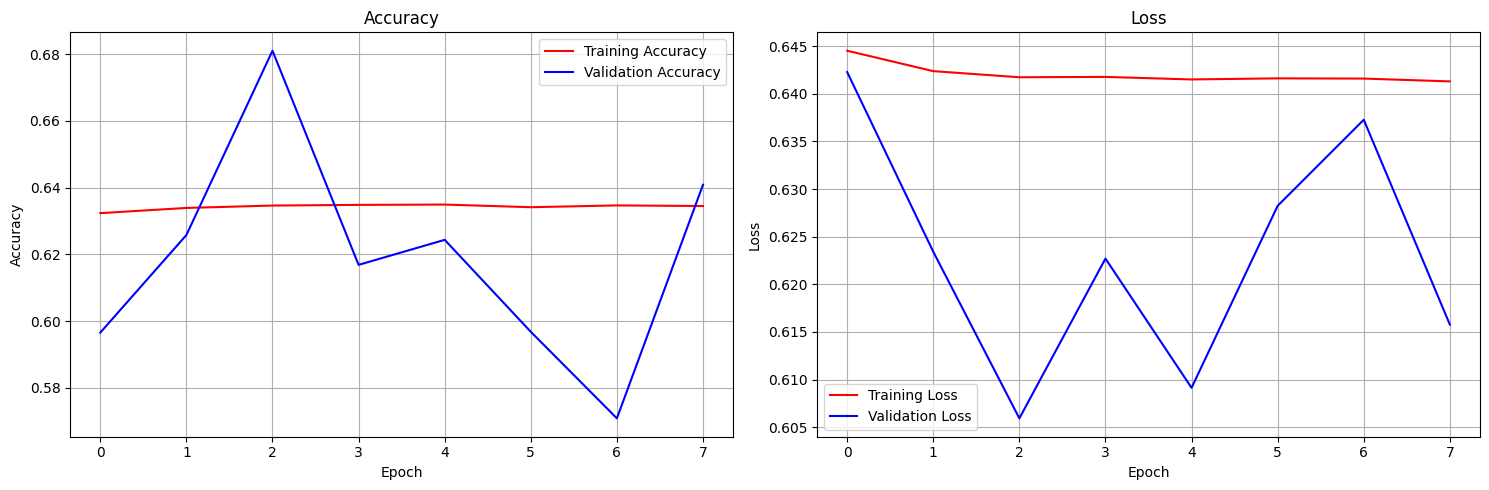

In [ ]:
import matplotlib.pyplot as plt

# 서브플롯 설정
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Accuracy 그래프
axes[0].plot(history.history['acc'], 'red', label="Training Accuracy")
axes[0].plot(history.history['val_acc'], 'blue', label='Validation Accuracy')
axes[0].set_title("Accuracy")
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid()

# Loss 그래프
axes[1].plot(history.history['loss'], 'red', label="Training Loss")
axes[1].plot(history.history['val_loss'], 'blue', label='Validation Loss')
axes[1].set_title("Loss")
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()

# y = grade

In [ ]:
import numpy as np
a = np.abs(df.corr().round(3)['grade'])
a.sort_values(ascending=False)[1:7] #상위 6개, 자기 자신 제외

sub_grade              0.994
int_rate               0.952
term                   0.458
revol_util             0.259
loan_status            0.257
verification_status    0.220
Name: grade, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from tqdm.notebook import tqdm


X = df[['int_rate', 'term', 'revol_util', 'loan_status', 'verification_status']]
y = df['grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# over sampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=1)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)


rfc = RandomForestClassifier(n_estimators=30, max_features=3, max_depth=7, random_state=1)

with tqdm(total=len(X_train_over)) as pbar:
    rfc.fit(X_train_over, y_train_over)
    pbar.update(len(X_train_over))

y_pred = rfc.predict(X_test)

  0%|          | 0/568267 [00:00<?, ?it/s]

In [ ]:
rfc.score(X_train_over,y_train_over)

0.8556488411257385

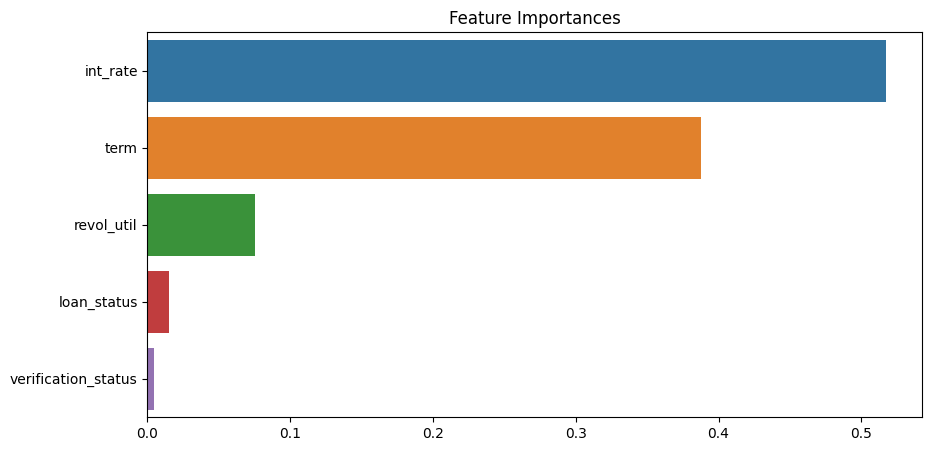

In [ ]:
# feature importances

feature_importances = rf.feature_importances_
s_f_i = pd.Series(feature_importances, index=X.columns)
s_f_i = s_f_i.sort_values(ascending=False)[:6]

plt.figure(figsize=(10,5))
sns.barplot(x=s_f_i, y=s_f_i.index)
plt.title('Feature Importances')
plt.show()

In [ ]:
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

TP = cm[1][1]
FN = cm[1][0]
TN = cm[0][0]
FP = cm[0][1]

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("G-Mean : ", gmean([sensitivity, specificity]),"\n")

accuracy = accuracy_score(y_test, y_pred)
print("RandomForestClassifier Accuracy : ", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[18998   254     0     0     0     0     0]
 [  395 30219  4178     0     0     0     0]
 [    3  1438 24196  6134     1     0     0]
 [    1    11   465 16001  2557     0     0]
 [    0     0    11  1273  7734   409     9]
 [    0     0     0    52   426  2900   148]
 [    0     0     0     6    51    52   805]]
G-Mean :  0.9869519752701594 

RandomForestClassifier Accuracy :  0.8494529466759878
Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.99      0.98     19252
           2       0.95      0.87      0.91     34792
           3       0.84      0.76      0.80     31772
           4       0.68      0.84      0.75     19035
           5       0.72      0.82      0.77      9436
           6       0.86      0.82      0.84      3526
           7       0.84      0.88      0.86       914

    accuracy                           0.85    118727
   macro avg       0.84      0.85      0.84    118727
weighted avg    

# DL

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model = Sequential()
model.add(Dense(128, activation = 'relu', input_shape=(X_train_over.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['acc'])
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=5)
mc = ModelCheckpoint(filepath='best.h5', verbose=1, monitor='val_loss', mode='auto', save_best_only=True)

In [ ]:
from tqdm.keras import TqdmCallback

history = model.fit(X_train_over, y_train_over, epochs=50,
                    validation_data=(X_test, y_test),
                    verbose=0,
                    callbacks=[es, mc, TqdmCallback(verbose=1)])

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]


Epoch 1: val_loss improved from inf to 121.74586, saving model to best.h5

Epoch 2: val_loss did not improve from 121.74586

Epoch 3: val_loss did not improve from 121.74586

Epoch 4: val_loss did not improve from 121.74586

Epoch 5: val_loss did not improve from 121.74586

Epoch 6: val_loss did not improve from 121.74586
Epoch 6: early stopping


In [ ]:
print(f"Training Accuracy: {history.history['acc'][-1]:.4f}")

Training Accuracy: 0.6334


In [ ]:
print(f"Validation Accuracy: {history.history['val_acc'][-1]:.4f}")

Validation Accuracy: 0.1622


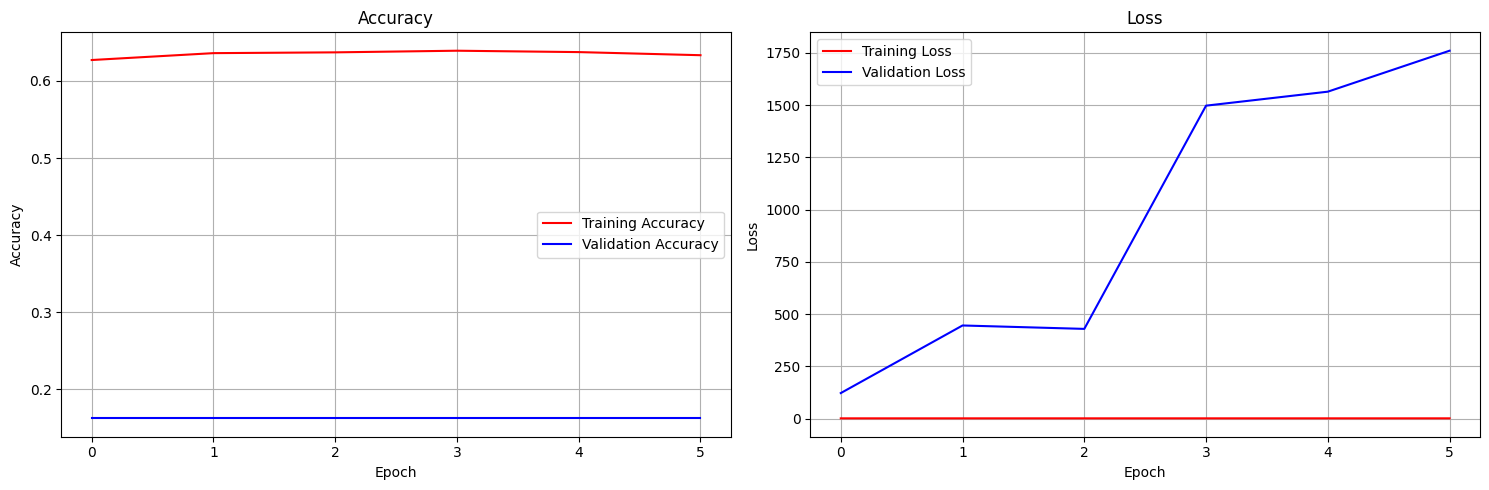

In [ ]:
import matplotlib.pyplot as plt

# 서브플롯 설정
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Accuracy 그래프
axes[0].plot(history.history['acc'], 'red', label="Training Accuracy")
axes[0].plot(history.history['val_acc'], 'blue', label='Validation Accuracy')
axes[0].set_title("Accuracy")
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid()

# Loss 그래프
axes[1].plot(history.history['loss'], 'red', label="Training Loss")
axes[1].plot(history.history['val_loss'], 'blue', label='Validation Loss')
axes[1].set_title("Loss")
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()